<img src="https://webassets.unt.edu/assets/branding/unt-stacked-logo.svg" alt="UNT | University of North Texas" class="desktop-logo" width="300" height="500">

<div style="text-align: right"><strong>Young Yu</strong></div>
<div style="text-align: right"><strong>Date</strong></div>
<div style="text-align: right"><strong>Student Id</strong></div>
<div style="text-align: right"><strong>ADTA 5240</strong></div>

**References:** <br>
<br>
*Citations*
- [Regression Models with multiple target variables](https://towardsdatascience.com/regression-models-with-multiple-target-variables-8baa75aacd)
- 
*Images*
- [Data Science Life Cycle](https://medium.com/@skeredy/taking-the-first-step-understanding-the-6-stages-of-the-data-science-life-cycle-141ee6296ce2)
<!-- A lot of the data visual structuring was borrowed Mardiat-Iman, so these lines stay. Converting the visuals to functions are my own, but the structuring was inspired by Mardiat Iman's contributions on Github --> 
- [Project Inspiration: Github](https://github.com/jupyter-nass/awesome-notebooks)
- [Visualizations: Mardiat-Iman](https://www.linkedin.com/in/mardiat-iman-ibrahim-imam-726027262)


# **Risk Modeling**
**Background**<br>
<br>
<br>
**Business Proposal**   

* **The goal of problem** 

## About the Dataset

##### Target Variables
##### Predictors

### Data Dictionary
|      Column      |   DataType   | DataClass |                             Desc                              |
|:----------------:|:------------:|:---------:|:-------------------------------------------------------------:|
|   ***TagName***  | Categorical  | Nominal   | Variable name |
|     ***Date***   |   Date/Time  |   N/A     | Date when data was recorded |
|    ***Value***   |  Numerical   | Continuous| Value of the data point |
|   ***vValue***   |  Numerical   | Continuous|                         |
|   ***MinRaw***   |  Numerical   | Continuous| Minimum value for the tag |
|   ***MaxRaw***   |  Numerical   | Continuous| Maximum value for the tag |
|    ***MinEU***   |  Numerical   | Continuous| Minimum value for the engineering unit value |
|    ***MaxEU***   |  Numerical   | Continuous| Maximum value for the engineering unit value |
|     ***Unit***   | Categorical  | Nominal   | Unit of measurement |
|   ***Quality***  |  Numerical   | Continuous| Quality of the data during read |
|***QualityDetail***| Categorical | Ordinal   | Key value for a list of codes |
|***QualityString***| Categorical | Ordinal   | Description of QualityDetail |
|***StartDateTime***|  Date/Time  |   N/A     | Date and time of value was last updated |


## Methodology Section
<br>
Rank	Offense
1	TRAFFIC VIOLATION - HAZARDOUS
2	ANIMAL OFFENSES
3	MISCELLANEOUS
4	DRIVING UNDER THE INFLUENCE
5	FAMILY OFFENSES, NONVIOLENT
6	COUNTERFEITING / FORGERY
7	EMBEZZLEMENT
8	FRAUD OFFENSES
9	ALL OTHER OFFENSES
10	DRUG/ NARCOTIC VIOLATIONS
11	WEAPON LAW VIOLATIONS
12	MOTOR VEHICLE THEFT
13	BURGLARY/ BREAKING & ENTERING
14	LARCENY/ THEFT OFFENSES
15	DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY
16	ARSON
17	ROBBERY
18	ASSAULT OFFENSES
19	KIDNAPPING/ ABDUCTION
20	HOMICIDE OFFENSES

## Model Section

##### K-Nearest Neighbor <br>

##### Decision Tree <br>

##### Support Vector Regression <br>

## Code Section

### About the Code

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from joblib import dump, load

# PCA

In [ ]:
# Assign the data filename to a variable
file = 'data/Output_Final.csv'

In [ ]:
def filetype(file):
    """
    This function is for loading small datasets. The file type must be a .csv
    or one of the listed Excel formats.

    Parameters:
    - file (str): The file path to the data.

    Example: 
    df = df.read_csv(file, data parse_date=['datetime'], index_col='datetime')
    """
    try:
        if file.endswith('.csv'):
            df = pd.read_csv(file, skiprows=lambda x: x % 2 != 0)
            return df  
        elif file.endswith(('.xls', '.xlsx', '.odf', '.ods', '.odt')):  
            df = pd.read_excel(file)
            return df  
        else:
            print(f'Error: The file {file} has an unsupported format.')
            return None  
    except Exception as e: 
        print(f'An error occurred: {e}')
        return None
    

df = filetype(file) 

In [ ]:
# Copies the original dataframe into a copy leaving the original unaltered.
df_copy = df.copy()

In [ ]:
object_columns = df_copy.select_dtypes(include=['object']).columns
df_transform = df_copy.drop(object_columns, axis=1) 
# msno.matrix(df_transform.sample(250))
# df_transform.info()

In [ ]:
cols = [
    'Reporting Area', 'Responding Officer #1  Badge No', 'Responding Officer #2 Badge No',
        'Reporting Officer Badge No','X Coordinate', 'Y Cordinate'
        ]
df_transform.drop(cols, axis=1, inplace=True)
# msno.matrix(df_transform.sample(250))
df_transform.dropna()

In [ ]:
X = df_transform
n_components = 10

In [ ]:
def pca(X, n_components=None):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    pca_result = pd.DataFrame(X_pca, columns=columns)
  
    pca_summary = pd.DataFrame({
        'Standard Deviation': np.sqrt(pca.explained_variance_),
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }).transpose()
    pca_summary.columns = columns  
    pca_summary = pca_summary.round(4) 
    
    plt.figure(figsize=(10, 6))
    plt.bar(columns, pca.explained_variance_ratio_, alpha=0.7, align='center',
            label='Individual explained variance')
    plt.step(columns, pca.explained_variance_ratio_.cumsum(), where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.xticks(rotation=45)  
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    return pca_result, pca_summary, pca

pca(X, n_components=10)

# Geographical Plot w/ Filtering


In [ ]:
# Assign the data filename to a variable
data = 'data/Output_2023.csv'

In [ ]:
# recalling the previous function
df = filetype(data) 

In [ ]:
df_copy = df.copy()

In [ ]:
df = df_copy
x = 'x'
y = 'y'
categories = ['incident_type'] 
color_options = ["red", "blue"]

In [ ]:
def geo_plot(df, x, y, categories, color_options):
    """
    Creates a Dash app with dynamic dropdowns for filtering a map visualization.
    
    Parameters:
    - df: DataFrame containing the data to be visualized.
    - x: String, the column name in df for x-axis values.
    - y: String, the column name in df for y-axis values.
    - categories: List of strings, the column names in df to create filters for. The first category listed will be the legend.
    - color_options: List of strings, colors for the plot.
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame")
    
    if not all(isinstance(item, str) for item in categories):
        raise ValueError("All categories must be string names of the dataframe columns")
    
    if not (isinstance(color_options, list) and len(color_options) >= 1):
        raise ValueError("color_options must be a list of color strings with at least one color")
    
    app = Dash(__name__)

    # Dynamic generation of dropdowns
    dropdowns = []
    for idx, category in enumerate(categories, start=0):
        unique_values = df[category].dropna().unique()
        options = [{'label': 'No Filter', 'value': 'No Filter'}] + \
                  [{'label': value, 'value': value} for value in unique_values]
        dropdown = dcc.Dropdown(
            id=f'category{idx}-dropdown',
            options=options,
            value='No Filter',  # Default value
        )
        dropdowns.append(dropdown)
    
    app.layout = html.Div(dropdowns + [dcc.Graph(id='data-map')])

    @app.callback(
        Output('data-map', 'figure'),
        [Input(f'category{idx}-dropdown', 'value') for idx, _ in enumerate(categories)]
    )
    def update_map(*selected_values):
        filtered_df = df
        for category, selected_value in zip(categories, selected_values):
            if selected_value != 'No Filter':
                filtered_df = filtered_df[filtered_df[category] == selected_value]
                
        if filtered_df.empty:
            raise ValueError("Filtered dataset is empty. Adjust filter selections.")
        
        # Use the first category for coloring
        color_category = categories[0]
        fig = px.scatter_mapbox(filtered_df, lat=x, lon=y,
                                color=color_category,
                                zoom=3, height=800)
        fig.update_layout(
            mapbox_style="white-bg",
            mapbox_center={"lon": -96.7970, "lat": 32.7767},
            mapbox_zoom=9.5,
            mapbox_layers=[{
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": "United States Geological Survey",
                "source": [
                    "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                ]
            }],
            margin={"r":0,"t":0,"l":0,"b":0}
        )
        return fig

    return app

if __name__ == '__main__':
    app = geo_plot(df, 'x', 'y', categories, color_options)
    app.run_server(debug=True)

# KMEANS - Clustering

In [ ]:
# Assign the data filename to a variable
file = 'data/Output_2023.csv'

In [ ]:

df = filetype(file) 

In [ ]:
df_copy = df.copy()


In [ ]:
# Inputs
df = df_copy
features = ['severity']


In [ ]:
# Input
df = df_copy
x_col = 'x'
y_col = 'y'
title = 'Clusters'
fig_path = f'visuals/{title}.png'
n_clusters_range = (1, 30)
n_init = 15
random_state = None

In [ ]:
def kmeans_plot(df, x_col, y_col, title, fig_path, n_clusters_range=(1, 10), n_init=10, random_state=42):
    
    X = df[[x_col, y_col]]
    
    wcss = []
    for i in range(*n_clusters_range):
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=random_state)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(*n_clusters_range), wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Curve')
    plt.show()
    
    try:
        num_clusters = int(input("Enter the number of clusters based on the elbow curve: "))
    except ValueError:
        print("Invalid number. Using the default 3 clusters.")
        num_clusters = 3
    
    kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=random_state)
    df['cluster_label'] = kmeans.fit_predict(X)

    centers = kmeans.cluster_centers_
    
    fig = plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='cluster_label', palette='viridis', s=50, alpha=0.5, edgecolor='black')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centers')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.grid(True)
    
    fig.savefig(fig_path)
    plt.show()

kmeans_plot(df, x_col, y_col, title, fig_path, n_clusters_range, n_init, random_state)

In [ ]:
dump(kmeans_plot, 'kmeans_model.joblib')

# DBSCAN - Clustering

In [ ]:
# Assign the data filename to a variable
file = 'data/Output_Final.csv'

In [ ]:
df = filetype(file) 

In [ ]:
df_copy = df.copy()

In [ ]:
# Inputs
df = df_copy
features = ['severity', 'x', 'y']


In [ ]:
def numeric_data(df, features):
    """
    This function drops categorical data for quick analysis of the 
    selected numerical data, then scales the data into a new data frame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - features (list): The selected numeric columns from a list.

    Returns:
    - A processed DataFrame with scaled numeric features.
    """
    # Drop columns with object data type
    object_columns = df.select_dtypes(include=['object']).columns
    df_clean = df.drop(object_columns, axis=1)
    
    # Drop rows with NaN values
    df_clean = df_clean.dropna()
    
    # Scale features
    scaler = StandardScaler()
    df_clean[features] = scaler.fit_transform(df_clean[features])
    
    return df_clean

df_transform = numeric_data(df_copy, features)

In [ ]:
df = df_copy
epsilon = 0.1
min_samples = 10

In [ ]:
def dbscan(df, epsilon=0.01, min_samples=2):
    """
    Perform DBSCAN clustering on geographic data and generate a folium map to visualize the clusters.
    
    Args:
    locations (DataFrame): DataFrame containing 'x' and 'y' columns for latitude and longitude.
    epsilon (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    folium.Map: A folium map with clustered points visualized.
    """
    # Convert geographic coordinates from degrees to radians for DBSCAN
    radians = np.radians(df[['x', 'y']])
    # Create a DBSCAN clusterer
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')
    # Fit and predict clusters
    df['cluster'] = db.fit_predict(radians)

    # Create a map centered around the average location
    map_center = [df['x'].mean(), df['y'].mean()]
    crime_map = folium.Map(location=map_center, zoom_start=11.5)

    # Add points to the map
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=(row['x'], row['y']),
            radius=.01,
            color=['blue', 'red', 'green', 'purple', 'orange'][row['cluster'] % 5],
            fill=True,
            fill_color=['blue', 'red', 'green', 'purple', 'orange'][row['cluster'] % 5],
            popup=f'Cluster: {row["cluster"]}'
        ).add_to(crime_map)

    return crime_map

dbscan(df, epsilon, min_samples)

In [ ]:
dump(dbscan, 'dbscan_model.joblib')

In [ ]:
# Inputs

df = df_transform
x_col = 'x'
y_col = 'y'
eps = 0.2
min_samples = 6
title = 'DBSCAN'
fig_path = f'visuals/{title}.png'
point_size = 50
alpha = 0.3

In [ ]:
def dbscan(df, x_col, y_col, eps, min_samples, title, fig_path, point_size, alpha):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df[[x_col, y_col]])
    df.loc[:,'cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['cluster'], palette='viridis', edgecolor='k', s=point_size, alpha=alpha, legend='full')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    noise_points = df[df['cluster'] == -1]
    if not noise_points.empty:
        plt.scatter(noise_points[x_col], noise_points[y_col], color='red', marker='x', s=point_size, label='Noise')
    
    plt.legend(title='Cluster ID')
    
    if fig_path:
        plt.savefig(fig_path)
    
    plt.show()

dbscan(df, x_col, y_col, eps, min_samples, title, fig_path, point_size, alpha)

# KNN Classification & Regression

In [268]:
# Assign the data filename to a variable
file = 'data/Output_Final.csv'

In [269]:
df = filetype(file) 

In [270]:
df_copy = df.copy()

In [271]:
df = df_copy

In [272]:
df_copy['high_risk'] = (df['severity'] > 14).astype(bool) 
df_copy.drop('Crime Category', axis=1, inplace=True)

In [273]:
df_copy.drop('Day of the Week', axis=1, inplace=True)

In [274]:
df_copy.drop('Year of Incident', axis=1, inplace=True)

In [275]:
def process_data(df):
    """
    This function converts categorical variables into dummy/indicator variables,
    and drops rows with NaN values after encoding, then scales all thenumerical features. 

    Parameters:
    - df(DataFrame): The input DataFrame.

    Returns:
    - A processed DataFrame with scaled numeric features and encoded categorical variables.
    """
    # Convert categorical variables into dummy variables
    df_dummies = pd.get_dummies(df, drop_first=True)

    numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns
    
    # Scale numeric features
    scaler = StandardScaler()
    df_dummies[numeric_cols] = scaler.fit_transform(df_dummies[numeric_cols])
    
    df_clean = df_dummies.dropna()

    return df_clean

df_transform = process_data(df_copy)

In [276]:
# df_transform.drop('Unnamed: 0', axis=1, inplace=True)
df_transform.drop('severity', axis=1, inplace=True)


In [278]:
target = df_transform['high_risk']
df_transform.tail()

,Watch,Sector,District,x,y,high_risk,LocType_Residential,Division_NORTH CENTRAL,Division_NORTHEAST,Division_NORTHWEST,...,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,NIBRS Crime Against_PROPERTY,NIBRS Crime Against_SOCIETY
96126,0.123325,0.617997,-0.261545,0.952741,-1.220616,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
96127,0.123325,0.566495,-1.255380,0.766226,-0.929219,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
96128,0.123325,0.566495,-0.261545,0.699052,-1.280402,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
96129,0.123325,0.514994,-1.255380,0.267334,-1.076101,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
96130,0.123325,0.566495,-1.255380,0.406154,-0.700505,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [279]:
df_transform.drop(['high_risk'], axis=1, inplace=True)

In [281]:
X = df_transform
y = target
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)                                            
max_k=10
problem_type='classification'

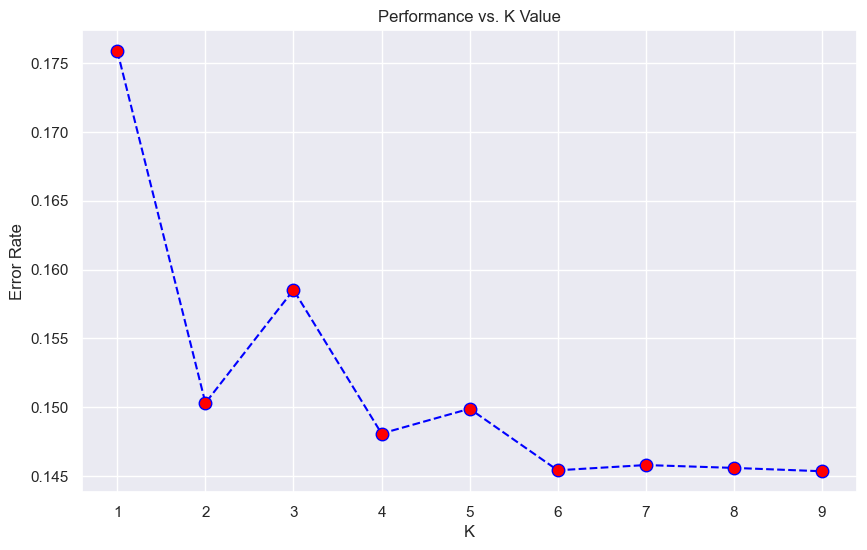

Best K Value: 1
Confusion Matrix:
[[21609  2477]
 [ 2595  2159]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.90      0.89     24086
        True       0.47      0.45      0.46      4754

    accuracy                           0.82     28840
   macro avg       0.68      0.68      0.68     28840
weighted avg       0.82      0.82      0.82     28840


In [282]:
def knn(X_train, y_train, X_test, y_test, max_k=30, problem_type='classification'):
    error_rate = []
    best_k = 1
    best_performance = np.inf if problem_type == 'regression' else -np.inf
    
    # model based on the problem type
    ModelClass = KNeighborsClassifier if problem_type == 'classification' else KNeighborsRegressor
    
    # Loop over a range of k values to find the one with the best performance
    for i in range(1, max_k):
        knn = ModelClass(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        
        if problem_type == 'classification':
            error = np.mean(pred_i != y_test)
        else:  # regression
            error = mean_squared_error(y_test, pred_i)
        
        error_rate.append(error)
        
        if (problem_type == 'classification' and error < best_performance) or (problem_type == 'regression' and error < best_performance):
            best_performance = error
            best_k = i
            
    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(range(1,max_k), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=9)
    plt.title('Performance vs. K Value')
    plt.xlabel('K')
    if problem_type == 'classification':
        plt.ylabel('Error Rate')
    else:
        plt.ylabel('Root Mean Squared Error')
    plt.show()
    
    # Retrain and evaluate with the best k value
    knn_best = ModelClass(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)
    pred_best = knn_best.predict(X_test)
    
    print(f"Best K Value: {best_k}")
    if problem_type == 'classification':
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, pred_best))
        print("\nClassification Report:")
        print(classification_report(y_test, pred_best))
    else:
        print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, pred_best, squared=True))
        print("R^2 Score:", r2_score(y_test, pred_best))

knn(X_train, y_train, X_test, y_test, max_k, problem_type)

In [283]:
dump(knn, 'knn_model.joblib')

['knn_model.joblib']

In [ ]:
df = df_copy
cols = []
kde = True
figsize = (3, 3)
cmap = 'viridis'
# Outputs
fig_path = 'hist_plot.png'

In [ ]:
for col in df_copy.columns:
    cols.append(col)
    print(cols)

In [ ]:
def create_histogram(df, cols, kde, figsize, cmap, fig_path):
    sns.set(style="darkgrid")
    n_cols = len(cols)

    cols_per_row = 4 
    n_rows = n_cols // cols_per_row + (1 if n_cols % cols_per_row else 0)
    total_figsize = (figsize[0] * min(n_cols, cols_per_row), figsize[1] * n_rows)
    
    fig, axs = plt.subplots(n_rows, min(n_cols, cols_per_row), figsize=total_figsize, squeeze=False)
    
    colormap = plt.colormaps[cmap]
    
    for ax, column, i in zip(axs.flat, cols, np.linspace(0, 1, len(cols))):
        color = colormap(i)
        sns.histplot(data=df, x=column, kde=kde, color=color, ax=ax)

    plt.tight_layout()
    plt.show()

    plt.savefig(fig_path)    

create_histogram(df, cols, kde, figsize, cmap, fig_path)

In [ ]:
df_copy['high_risk'] = (df['severity'] < 9).astype(int) 

# One-hot encode categorical variables
df_transform = pd.get_dummies(df_copy, columns=['LocType','Division','Month', 'Day of the Week'], drop_first=True)

In [ ]:
df = df_transform
features = []
for cols in df_transform:
    features.append(cols)
print(features)

In [ ]:
features.remove('NIBRS Crime Against')

In [ ]:
def numeric_data(df, features):
    """
    This function drops categorical data for quick analysis of the 
    selected numerical data, then scales the data into a new data frame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - features (list): The selected numeric columns from a list.

    Returns:
    - A processed DataFrame with scaled numeric features.
    """
    # Drop columns with object data type
    object_columns = df.select_dtypes(include=['object']).columns
    df_clean = df.drop(object_columns, axis=1)
    
    # Drop rows with NaN values
    df_clean = df_clean.dropna()
    
    # Scale features
    scaler = StandardScaler()
    df_clean[features] = scaler.fit_transform(df_clean[features])
    
    return df_clean

df_scaled = numeric_data(df, features)

In [ ]:
def logistic_regression(df):

    
    # Feature selection - here selecting all one-hot encoded features and numerical features as example
    X = df.select_dtypes(include=['uint8', 'int64', 'float64']).drop('high_risk', axis=1)
    y = df['high_risk']
    
    # Scaling the features (important for logistic regression)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
    
    # Creating and fitting the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Making predictions
    predictions = model.predict(X_test)
    
    # Evaluating the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

logistic_regression(df)